In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Timing and Performance Measurement
from timeit import default_timer as timer
import time

# Data Manipulation and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import RFE, RFECV, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.manifold import TSNE
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
import xgboost as XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from yellowbrick.model_selection import FeatureImportances

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, make_scorer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Imbalanced Data Handling
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SVMSMOTE, SMOTE, ADASYN

#warnings
import warnings
warnings.filterwarnings('ignore')

# Some Feature Engineering

In [225]:
df = pd.read_csv("loan_model.csv")

In [226]:
df

,Credit_Policy,Purpose,Interest_Rate,Installment,Log_Annual_Income,Debt_Income_Ratio,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,Delinquencies_in_2_Years,Public_Records,Not_Fully_Paid,Interest_Rate_Bin,Installment_Interact,Revolving_Utilization_Binned
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.10,0,0,0,0,1,98.579990,1
1,1,debt_consolidation,0.1299,370.59,10.868568,17.94,667,3269.000000,17771,52.10,2,0,0,1,1,48.139641,1
2,1,all_other,0.1166,198.32,11.112448,7.07,677,6060.000000,8224,52.10,0,0,0,0,1,23.124112,1
3,1,credit_card,0.1189,169.14,10.239960,16.11,697,4080.000000,20722,52.10,2,0,0,0,1,20.110746,1
4,1,all_other,0.1189,66.33,9.392662,5.70,707,2970.000000,1616,52.10,1,0,0,0,1,7.886637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1324,104.81,10.714418,12.00,657,8940.000000,2829,108.80,0,0,0,0,1,13.876844,2
9574,0,all_other,0.1103,98.26,10.596635,3.09,677,1291.958333,3127,104.20,0,0,0,0,0,10.838078,2
9575,0,debt_consolidation,0.1166,181.79,9.903688,9.90,677,1471.000000,5111,104.30,4,0,0,0,1,21.196714,2
9576,0,credit_card,0.1222,249.90,11.097410,12.11,677,5070.000000,5319,106.40,0,0,0,0,1,30.537780,2


# Model Building

In [227]:
df1 = pd.get_dummies(data = df)

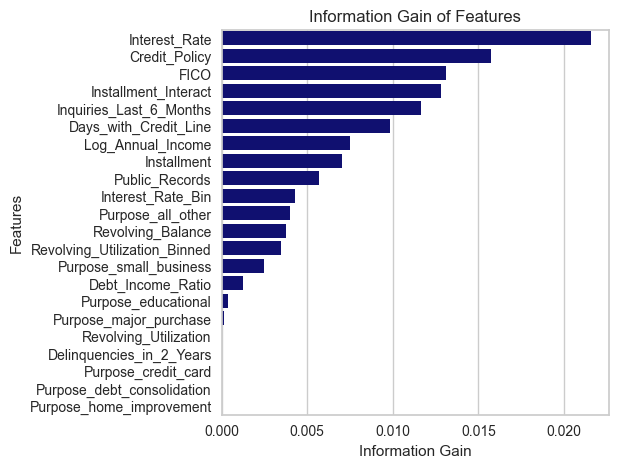

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x = df1.drop(["Not_Fully_Paid"], axis=1)
y = df1["Not_Fully_Paid"]

information_gain = mutual_info_classif(x, y)

# Create a DataFrame with feature names and their information gain values
gain_df = pd.DataFrame({"Feature": x.columns, "Information Gain": information_gain})

# Sort the DataFrame by information gain values in descending order
gain_df_sorted = gain_df.sort_values(by="Information Gain", ascending=False)

# Plot the sorted information gain values
plt.figure(figsize=(5, 5))
sns.barplot(x="Information Gain", y="Feature", data=gain_df_sorted, color='navy')
plt.title("Information Gain of Features")
plt.xlabel("Information Gain")
plt.ylabel("Features")
plt.show()



In [229]:
from itertools import combinations

column_list = x.columns
interactions = list(combinations(column_list, 2))
interactions

[('Credit_Policy', 'Interest_Rate'),
 ('Credit_Policy', 'Installment'),
 ('Credit_Policy', 'Log_Annual_Income'),
 ('Credit_Policy', 'Debt_Income_Ratio'),
 ('Credit_Policy', 'FICO'),
 ('Credit_Policy', 'Days_with_Credit_Line'),
 ('Credit_Policy', 'Revolving_Balance'),
 ('Credit_Policy', 'Revolving_Utilization'),
 ('Credit_Policy', 'Inquiries_Last_6_Months'),
 ('Credit_Policy', 'Delinquencies_in_2_Years'),
 ('Credit_Policy', 'Public_Records'),
 ('Credit_Policy', 'Interest_Rate_Bin'),
 ('Credit_Policy', 'Installment_Interact'),
 ('Credit_Policy', 'Revolving_Utilization_Binned'),
 ('Credit_Policy', 'Purpose_all_other'),
 ('Credit_Policy', 'Purpose_credit_card'),
 ('Credit_Policy', 'Purpose_debt_consolidation'),
 ('Credit_Policy', 'Purpose_educational'),
 ('Credit_Policy', 'Purpose_home_improvement'),
 ('Credit_Policy', 'Purpose_major_purchase'),
 ('Credit_Policy', 'Purpose_small_business'),
 ('Interest_Rate', 'Installment'),
 ('Interest_Rate', 'Log_Annual_Income'),
 ('Interest_Rate', 'Debt

In [300]:
x = df1.drop(["Not_Fully_Paid"], axis=1)
y = df1["Not_Fully_Paid"]

In [301]:
interaction_dict = {}
for interaction in interactions:
    x_train_int = x
    x_train_int['int'] = x_train_int[interaction[0]] * x_train_int[interaction[1]]
    model = LogisticRegression(n_jobs=-1)  # Set n_jobs=-1 for parallel processing
    model.fit(x_train_int, y)
    interaction_dict[model.score(x_train_int, y)] = interaction

In [302]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('Revolving_Utilization_Binned', 'Purpose_debt_consolidation')
('Debt_Income_Ratio', 'Revolving_Balance')
('Revolving_Utilization_Binned', 'Purpose_small_business')
('Delinquencies_in_2_Years', 'Purpose_debt_consolidation')
('Installment_Interact', 'Revolving_Utilization_Binned')


In [303]:
# Create the interaction columns
x['1'] = x['Revolving_Utilization_Binned'] * x['Purpose_debt_consolidation']
x['2'] = x['Debt_Income_Ratio'] * x['Revolving_Balance']
x['3'] = x['Revolving_Utilization_Binned'] * x['Purpose_small_business']
x['4'] = x['Installment_Interact'] * x['Revolving_Utilization_Binned']
x['5'] = x['Delinquencies_in_2_Years'] * x['Purpose_debt_consolidation']

# Print the updated x dataframe
x.head()

,Credit_Policy,Interest_Rate,Installment,Log_Annual_Income,Debt_Income_Ratio,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,...,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business,int,1,2,3,4,5
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,0,0,0,0,0,1,562075.92,0,98.579990,0
1,1,0.1299,370.59,10.868568,17.94,667,3269.000000,17771,52.1,2,...,0,0,0,0,0,1,318811.74,0,48.139641,0
2,1,0.1166,198.32,11.112448,7.07,677,6060.000000,8224,52.1,0,...,0,0,0,0,0,0,58143.68,0,23.124112,0
3,1,0.1189,169.14,10.239960,16.11,697,4080.000000,20722,52.1,2,...,0,0,0,0,0,0,333831.42,0,20.110746,0
4,1,0.1189,66.33,9.392662,5.70,707,2970.000000,1616,52.1,1,...,0,0,0,0,0,0,9211.20,0,7.886637,0


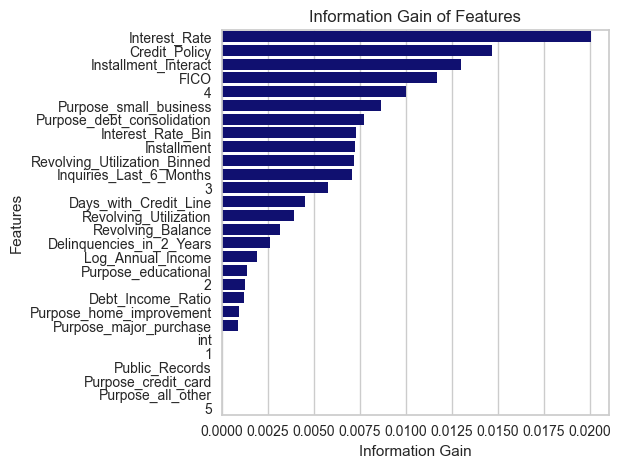

In [304]:
# Set random seed for reproducibility
np.random.seed(42)

# Calculate information gain
information_gain = mutual_info_classif(x, y)

# Create a DataFrame with feature names and their information gain values
gain_df = pd.DataFrame({"Feature": x.columns, "Information Gain": information_gain})

# Sort the DataFrame by information gain values in descending order
gain_df_sorted = gain_df.sort_values(by="Information Gain", ascending=False)

# Plot the sorted information gain values
plt.figure(figsize=(5, 5))
sns.barplot(x="Information Gain", y="Feature", data=gain_df_sorted, color='navy')
plt.title("Information Gain of Features")
plt.xlabel("Information Gain")
plt.ylabel("Features")
plt.show()

In [305]:
# Filter the DataFrame to eliminate features with information gain zero
selected_features = gain_df_sorted[gain_df_sorted["Information Gain"] > 0]["Feature"].tolist()

# Select only the columns corresponding to the selected features in your dataset
x_selected = x[selected_features]

In [306]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

,Credit_Policy,Interest_Rate,Installment,Log_Annual_Income,Debt_Income_Ratio,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,...,Interest_Rate_Bin,Installment_Interact,Revolving_Utilization_Binned,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,1,98.579990,1,0,0,1,0,0,0,0
1,1,0.1299,370.59,10.868568,17.94,667,3269.000000,17771,52.1,2,...,1,48.139641,1,0,0,1,0,0,0,0
2,1,0.1166,198.32,11.112448,7.07,677,6060.000000,8224,52.1,0,...,1,23.124112,1,1,0,0,0,0,0,0
3,1,0.1189,169.14,10.239960,16.11,697,4080.000000,20722,52.1,2,...,1,20.110746,1,0,1,0,0,0,0,0
4,1,0.1189,66.33,9.392662,5.70,707,2970.000000,1616,52.1,1,...,1,7.886637,1,1,0,0,0,0,0,0


In [61]:
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machines': SVC()
}

In [62]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga'],
    },
    'Decision Trees': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
    },
    'Gaussian Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    },
    'Support Vector Machines': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto'],
    },
}


In [140]:
# Create a DataFrame with column names
df_metric = pd.DataFrame(columns=["Metric", "Recall_score", "Accuracy_score", "F2_score"])

In [141]:
df_metric

,Metric,Recall_score,Accuracy_score,F2_score


In [95]:
from tqdm import tqdm

# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=LogisticRegression(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    LogisticRegression()
)

# Fit the pipeline on the training data with a progress bar
with tqdm(total=1, desc='Pipeline Progress') as pbar:
    pipeline.fit(x_train, y_train)
    pbar.update(0.50)  # Update progress bar after each step

    # Make predictions on the test set
    y_pred = pipeline.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

# Print the recall score
print("Recall score: {:.4f}".format(recall))


Pipeline Progress: 100%|███████████████████████████████████████████████████████████████| 1.0/1 [00:19<00:00, 19.47s/it]

Recall score: 0.6124


In [309]:
# Define the sampling strategy
sampling_strategy = {0: 6000, 1: 6000}

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(sampling_strategy = sampling_strategy,
           random_state=42),
    PCA(n_components=10),
    GridSearchCV(LogisticRegression(),
                 param_grid= param_grid,
                 scoring='recall',
                 n_jobs=-1,
                 cv=StratifiedKFold(n_splits=10))
)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

Recall score: 0.7398


In [310]:
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [311]:
df_metric = df_metric.append({"Metric": "Logistic Regression",
                              "Recall": recall,
                              "F1":f1,
                               "ROC_auc":roc_auc}, ignore_index=True)

In [317]:
df_metric

,Metric,F1,ROC_auc,Recall
0,GBClassifier,32.820000,59.980000,57.860000
1,ExtraTrees,0.358703,0.626108,0.526214
2,SVC,0.350028,0.622797,0.617476
3,RandomForest,0.337284,0.609628,0.607767
4,Logistic Regression,0.349381,0.627084,0.739806


In [313]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.91      0.51      0.66      2646
           1       0.23      0.74      0.35       515

    accuracy                           0.55      3161
   macro avg       0.57      0.63      0.50      3161
weighted avg       0.80      0.55      0.61      3161



In [130]:
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    GridSearchCV(LogisticRegression(),
                 param_grid={
                     'C': [0.1, 1, 10],
                 },
                 scoring='recall',
                 cv=StratifiedKFold(n_splits=5))
)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

Recall score: 0.6388


In [144]:
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [151]:
df_metric = df_metric.append({"Metric": "Logistic Regression",
                              "Recall": recall,
                              "F1":f1,
                               "ROC_auc":roc_auc}, ignore_index=True)

In [155]:
df_metric

,Metric,F1,ROC_auc,Recall
0,Logistic Regression,0.365556,0.638767,0.638835


# Random Forest Classifier

In [ ]:
# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=RandomForestClassifier(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    RandomForestClassifier()
)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

In [290]:
# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    PCA(n_components=10),
    RandomForestClassifier()
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample']
}

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Create GridSearchCV instance
    grid_search = GridSearchCV(pipeline,
                               param_grid,
                               cv=StratifiedKFold(n_splits=10),
                               n_jobs=-1,
                               scoring='recall')
    pbar.update(0.25)

    # Fit the pipeline on the training data using GridSearchCV
    grid_search.fit(x_train, y_train)
    pbar.update(0.25)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_
    pbar.update(0.25)

    # Make predictions on the test set using the best estimator
    y_pred = best_estimator.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))


Pipeline Progress: 100%|██████████████████████████████████████████████████████████████| 1.0/1 [11:26<00:00, 686.05s/it]

Recall score: 0.6078


In [291]:
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [292]:
df_metric = df_metric.append({"Metric": "RandomForest",
                              "Recall": recall,
                              "F1":f1,
                               "ROC_auc":roc_auc}, ignore_index=True)

In [295]:
df_metric

,Metric,F1,ROC_auc,Recall
0,Logistic Regression,36.560000,63.880000,63.880000
2,GBClassifier,32.820000,59.980000,57.860000
3,ExtraTrees,0.358703,0.626108,0.526214
4,SVC,0.350028,0.622797,0.617476
5,RandomForest,0.337284,0.609628,0.607767


In [298]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72      2646
           1       0.23      0.61      0.34       515

    accuracy                           0.61      3161
   macro avg       0.56      0.61      0.53      3161
weighted avg       0.78      0.61      0.66      3161



In [299]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1618, 1028],
       [ 202,  313]], dtype=int64)

# Gradient boost classifier

In [ ]:

# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=GradientBoostingClassifier(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    GradientBoostingClassifier()
)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

In [187]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'gradientboostingclassifier__learning_rate': [0.1, 0.05],
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__max_depth': [3, 4, 5]
}

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    PCA(),
    GradientBoostingClassifier()
)

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Define the GridSearchCV with the pipeline and parameter grid
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=make_scorer(recall_score),
        cv=StratifiedKFold(n_splits=5),
        verbose=1,
        n_jobs=3
    )
    pbar.update(0.25)

    # Fit the GridSearchCV on the training data
    grid_search.fit(x_train, y_train)
    pbar.update(0.25)

    # Make predictions on the test set using the best estimator from GridSearchCV
    y_pred = grid_search.best_estimator_.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

    # Print the recall score
    print("Best Recall score: {:.4f}".format(grid_search.best_score_))
    print("Recall score on test set: {:.4f}".format(recall))

Pipeline Progress:   0%|                                                                         | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 18 candidates, totalling 90 fits


Pipeline Progress: 100%|██████████████████████████████████████████████████████████████| 1.0/1 [08:39<00:00, 519.50s/it]

Best Recall score: 0.5658
Recall score on test set: 0.5786


In [188]:
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [190]:
df_metric = df_metric.append({"Metric": "GBClassifier",
                              "Recall": recall,
                              "F1":f1,
                               "ROC_auc":roc_auc}, ignore_index=True)

In [193]:
df_metric

,Metric,F1,ROC_auc,Recall
0,Logistic Regression,0.365556,0.638767,0.638835
1,RandomForest,0.348921,0.619637,0.565049
3,GBClassifier,0.328194,0.599789,0.578641


# SVC

In [267]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    PCA(n_components=10),
    SVC()
)

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Define the GridSearchCV with the pipeline and parameter grid
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=make_scorer(recall_score),
        cv=StratifiedKFold(n_splits=10),
        verbose=1,
        n_jobs=-1
    )
    pbar.update(0.25)

    # Fit the GridSearchCV on the training data
    grid_search.fit(x_train, y_train)
    pbar.update(0.25)

    # Make predictions on the test set using the best estimator from GridSearchCV
    y_pred = grid_search.best_estimator_.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

# Print the recall score
print("Best Recall score: {:.4f}".format(grid_search.best_score_))
print("Recall score on test set: {:.4f}".format(recall))

Pipeline Progress:   0%|                                                                         | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Pipeline Progress: 100%|██████████████████████████████████████████████████████████████| 1.0/1 [01:44<00:00, 104.91s/it]

Best Recall score: 0.5884
Recall score on test set: 0.6175


In [268]:
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [271]:
df_metric = df_metric.append({"Metric": "SVC",
                              "Recall (%)": recall,
                              "F1 (%)":f1,
                               "ROC_auc (%)":roc_auc}, ignore_index=True)

In [221]:
data = {
    'Metric': ['Logistic Regression', 'RandomForest', 'GBClassifier', 'SVC'],
    'F1': [0.365556, 0.348921, 0.328194, 0.361250],
    'ROC_auc': [0.638767, 0.619637, 0.599789, 0.630167],
    'Recall': [0.638835, 0.565049, 0.578641, 0.561165]
}

In [280]:
df_metric

,Metric,F1 (%),ROC_auc (%),Recall (%)
0,Logistic Regression,36.560000,63.880000,63.880000
1,RandomForest,34.890000,61.960000,56.500000
2,GBClassifier,32.820000,59.980000,57.860000
4,ExtraTrees,0.358703,0.626108,0.526214
6,SVC,0.350028,0.622797,0.617476


# Extra Trees

In [245]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'extratreesclassifier__n_estimators': [100, 200, 300],
    'extratreesclassifier__max_depth': [None, 5, 10],
    'extratreesclassifier__min_samples_split': [2, 5, 10],
    'extratreesclassifier__min_samples_leaf': [1, 2, 4],
    'extratreesclassifier__max_features': ['auto', 'sqrt', 'log2']
}

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    PCA(n_components=10),
    ExtraTreesClassifier(random_state=42)
)

# Perform GridSearchCV with optimized parameters
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=10,
    n_jobs=-1
)

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Make predictions on the test set using the best estimator from GridSearchCV
y_pred = grid_search.best_estimator_.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the best recall score and recall score on the test set
print("Best Recall score: {:.4f}".format(grid_search.best_score_))
print("Recall score on test set: {:.4f}".format(recall))

Best Recall score: 0.4922
Recall score on test set: 0.5262


In [244]:
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adasyn', ADASYN(random_state=42)), ('pca', PCA()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_depth=10, max_features='auto',
                                      min_samples_leaf=2, min_samples_split=10,
                                      random_state=42))])

In [246]:
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [249]:
df_metric = df_metric.append({"Metric": "ExtraTrees",
                              "Recall": recall,
                              "F1":f1,
                               "ROC_auc":roc_auc}, ignore_index=True)

In [282]:
df_metric

,Metric,F1,ROC_auc,Recall
0,Logistic Regression,36.560000,63.880000,63.880000
1,RandomForest,34.890000,61.960000,56.500000
2,GBClassifier,32.820000,59.980000,57.860000
4,ExtraTrees,0.358703,0.626108,0.526214
6,SVC,0.350028,0.622797,0.617476
